<a href="https://colab.research.google.com/github/jamescp/python/blob/main/Copy_of_AnaliseCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise dos dados da pandemia de Covid-19 no Maranhão durante os anos de 2020 a 2022.**

Trabalho Final: Python para quem usa R.

Autor: Jamesson Amaral Gomes

email: jamesson.agomes@gmail.com

In [ ]:
pip install geobr

In [1]:
#import geobr as geo
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt # plotting data

%matplotlib inline



In [ ]:
#05317-020, Vila Leopoldina, São Paulo
#data_sp["endereco_completo"] = data_sp["Endereco"] + ", " + data_sp["Numero"] + ", " + data_sp["Bairro"] + ", " + data_sp["Cep"] + ", " + data_sp["Municipio"]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


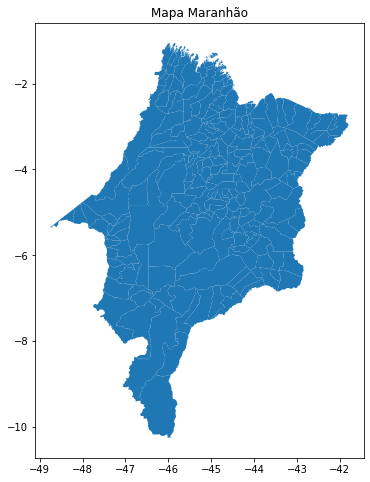

In [ ]:

all_muni = geo.read_municipality(code_muni="MA", year=2010)
all_muni.plot(figsize=(12,8));
plt.title('Mapa do Maranhão')
plt.show()


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

In [3]:
#Transformação tipo da colunda data:
df['date'] = pd.to_datetime(df['date'])

#Seleciona somente o estado do Maranhão
dadosMA= df[df.state == "MA"]

Casos e Óbitos atualizados do Maranhão.

In [4]:
#Visualização do conjunto de dos dados 
dadosMA.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

In [15]:
#Imprime dados atualizados dos Casos e Óbitos acumulados desde o início da pandemia no Maranhão.
print("Dados atualizados até:", dadosMA['date'].max())
print('Casos Totais MA:', dadosMA['newCases'].sum(),'\nÓbitos Totais MA:',dadosMA['newDeaths'].sum())

Dados atualizados até: 2022-07-25 00:00:00
Casos Totais MA: 456838 
Óbitos Totais MA: 10930


In [6]:
#Cria as colunas  mes, meses-ano e ano
dadosMA['mes'] = dadosMA['date'].dt.strftime('%b')
dadosMA['meses'] = dadosMA['date'].dt.to_period('m')
dadosMA['ano'] = dadosMA['date'].dt.strftime('%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [8]:
table1 = dadosMA.groupby(['ano', 'meses','mes']).agg(
    casos = ("newCases", "sum"),
    obitos = ("newDeaths", "sum")
)
                         
table1.tail()

casos  obitos
ano  meses   mes               
2022 2022-03 Mar  12711      82
     2022-04 Apr   6995      11
     2022-05 May   5484       6
     2022-06 Jun   5175       7
     2022-07 Jul  13597      34

#Curva de Casos Acumulados anos 2020 a 2022.

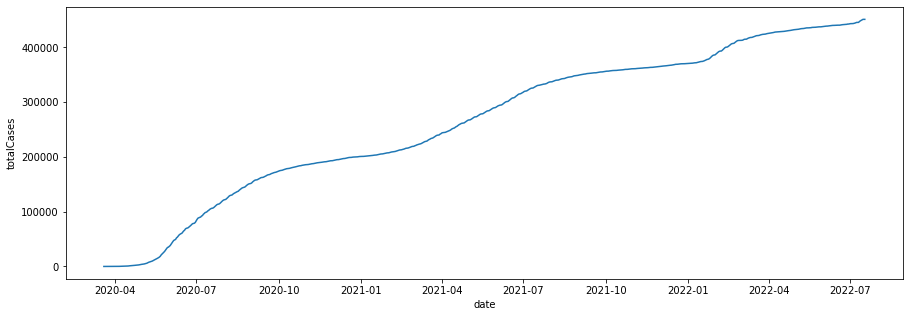

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dadosMA, x='date', y='totalCases');

#Curva de Casos anos 2021 e 2022.





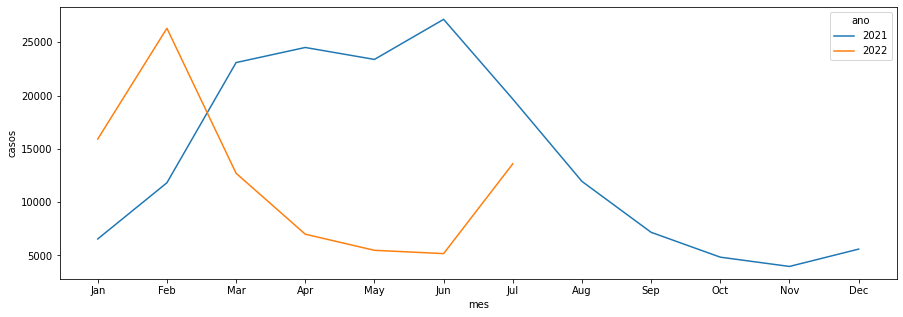

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x='mes',y='casos',data=table1.query("ano in['2021','2022']"),   hue='ano');
plt.show()

#Curva de Óbitos anos 2021 e 2022.

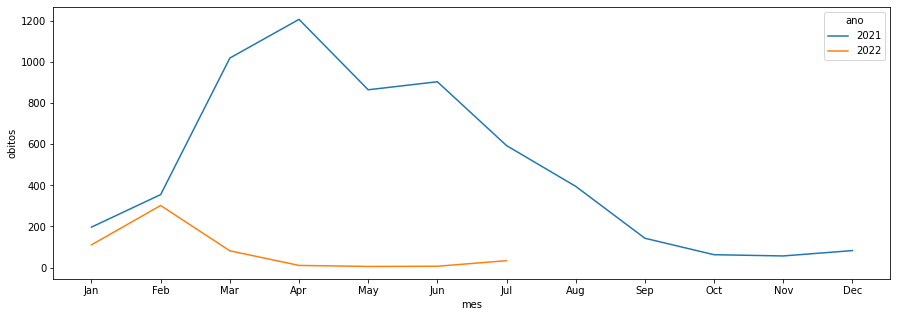

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(x='mes',y='obitos',data=table1.query("ano in['2021','2022']"),   hue='ano');
plt.show()

#Curva de Casos anos 2020 a 2022.

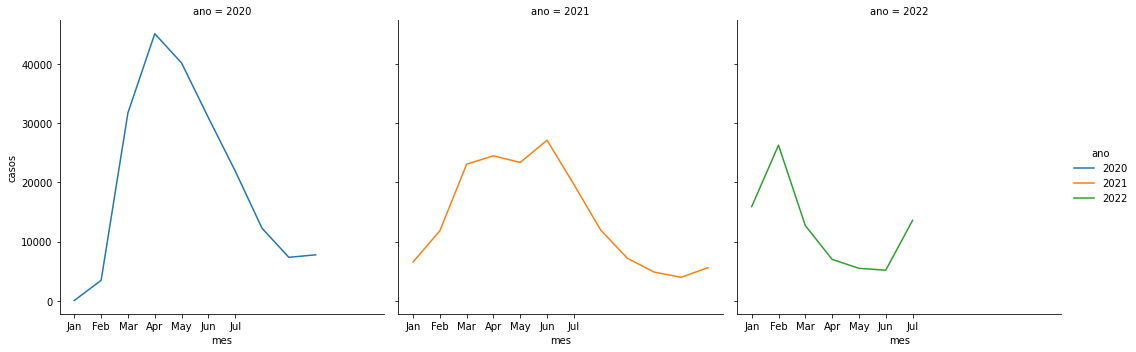

In [13]:
sns.relplot(x='mes', y='casos', data=table1.query("ano in['2020','2021','2022']"), kind = 'line', hue='ano', col = 'ano');


#Curva de Óbitos anos 2020 a 2022.

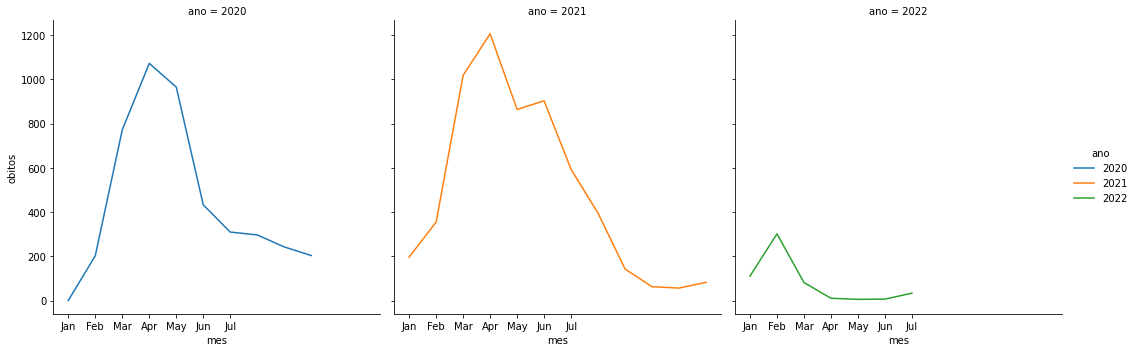

In [12]:
sns.relplot(x='mes', y='obitos', data=table1.query("ano in['2020','2021','2022']"), kind = 'line', hue='ano', sort = False, col = 'ano');
